In [2]:
%pylab inline
from PIL import Image
import numpy as np
import cv2

ImagenTotal = np.asarray(Image.open('OlivoTotal.png'))
#here you choose in between small, medium, large or extra
ImagenTemplate = np.asarray(Image.open('OlivoTemplate_small.png'))

Populating the interactive namespace from numpy and matplotlib


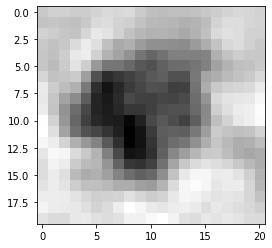

In [3]:
#notice that we work with one band
imagen = ImagenTotal[:,:,1]
tree = ImagenTemplate[:,:,1]
#print(arbol)
plt.imshow(tree,cmap='gray')

20 21


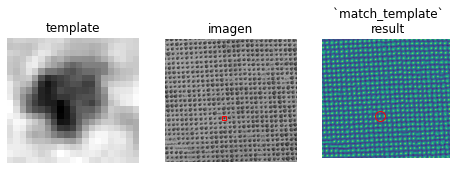

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.feature import match_template

result = match_template(imagen, tree)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2, adjustable='box')
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2, adjustable='box')

ax1.imshow(tree, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(imagen, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('imagen')
# highlight matched region
htree, wtree = tree.shape
print(htree,wtree)
rect = plt.Rectangle((x, y), wtree, htree, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()

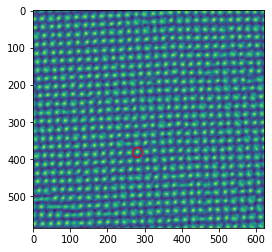

<Figure size 720x720 with 0 Axes>

In [6]:
#closer look of the match template
plt.imshow(result);
plt.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)
plt.figure(figsize = (10,10));

In [8]:
#filter results to match similar trees
filter_results = np.where(result>0.85)
max_results = np.where(result>0.99)

In [9]:
#some parameters for the figure layout

print(np.shape(filter_results))
print(np.shape(result))
print(np.shape(imagen))

(2, 554)
(586, 623)
(605, 643)


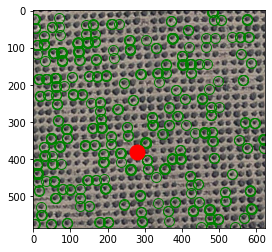

In [10]:
#show the interpreted results plus the best match
for p in range(np.shape(filter_results)[1]):
    plt.plot(filter_results[1][p], filter_results[0][p], 'o',
         markeredgecolor='g', markerfacecolor='none', markersize=10)

#best match    
plt.plot(max_results[1][0], max_results[0][0], 'o',
         markeredgecolor='r', markerfacecolor='r', markersize=15)

plt.imshow(ImagenTotal[10:-10,10:-10,:])
